<a href="https://colab.research.google.com/github/dewikinasih/Waste-Management-in-West-Java/blob/main/EDA_Sampah_Jabar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis Data Eksploratif dan Visualisasi Data


---
Data yang akan dianalisis adalah data capaian penganan sampah di Jawa Barat pada tahun 2021. Data tersebut diambil dari laman website SIPSN milik KLHK.Melalui project ini akan diketahui beberapa insight menarik yang bermanfaat untuk menambah bukti-bukti pendukung keputusan pengelolaan sampah yang tepat di wilayah Jawa Barat

```
keyword : sampah,Jawa Barat
```






In [ ]:
# import beberapa package yang dibutuhkan
import pandas as pd
import numpy as np

In [ ]:
# untuk mengambil data dari google drive
from google.colab import drive
drive.mount('/content/gdrive')
timbulan = pd.read_excel('/content/gdrive/MyDrive/TIMBULAN.xlsx')
print(timbulan)

Mounted at /content/gdrive
    Tahun    Provinsi  Kabupaten/Kota  Timbulan Sampah Harian(ton)  \
0    2021  Jawa Barat   Kab. Sukabumi                      1090.18   
1    2021  Jawa Barat    Kab. Bandung                      1268.33   
2    2021  Jawa Barat      Kab. Garut                      1120.06   
3    2021  Jawa Barat     Kab. Ciamis                       572.10   
4    2021  Jawa Barat   Kab. Kuningan                       467.07   
5    2021  Jawa Barat    Kab. Cirebon                      1237.12   
6    2021  Jawa Barat   Kab. Sumedang                       442.36   
7    2021  Jawa Barat  Kab. Indramayu                      1102.62   
8    2021  Jawa Barat      Kota Bogor                       673.76   
9    2021  Jawa Barat   Kota Sukabumi                       180.26   
10   2021  Jawa Barat    Kota Bandung                      1592.55   
11   2021  Jawa Barat    Kota Cirebon                       204.47   
12   2021  Jawa Barat     Kota Bekasi                      2375

In [ ]:
# ubah nama kolom supaya tidak terlalu panjang
timbulan =timbulan.rename({'Timbulan Sampah Tahunan(ton)' : 'Timbulan_tahunan'},axis=1)
timbulan = timbulan.rename({'Kabupaten/Kota':'Kab_Kota'},axis=1)

In [ ]:
# mengurutkan data
urut = timbulan.sort_values('Timbulan_tahunan', ascending=False)
urut

,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Harian(ton),Timbulan_tahunan
12,2021,Jawa Barat,Kota Bekasi,2375.99,867236.75
10,2021,Jawa Barat,Kota Bandung,1592.55,581280.03
13,2021,Jawa Barat,Kota Depok,1314.14,479660.75
1,2021,Jawa Barat,Kab. Bandung,1268.33,462939.17
5,2021,Jawa Barat,Kab. Cirebon,1237.12,451549.60
2,2021,Jawa Barat,Kab. Garut,1120.06,408821.79
7,2021,Jawa Barat,Kab. Indramayu,1102.62,402455.25
0,2021,Jawa Barat,Kab. Sukabumi,1090.18,397915.70
8,2021,Jawa Barat,Kota Bogor,673.76,245922.33
3,2021,Jawa Barat,Kab. Ciamis,572.10,208818.25


In [ ]:
# import package untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# statistika deskriptif
m = timbulan.Timbulan_tahunan.sum()
print('Total produksi sampah tahunan adalah',m,'ton')

Total produksi sampah tahunan adalah 5079261.29 ton


Text(0, 0.5, 'Kabupaten/Kota')

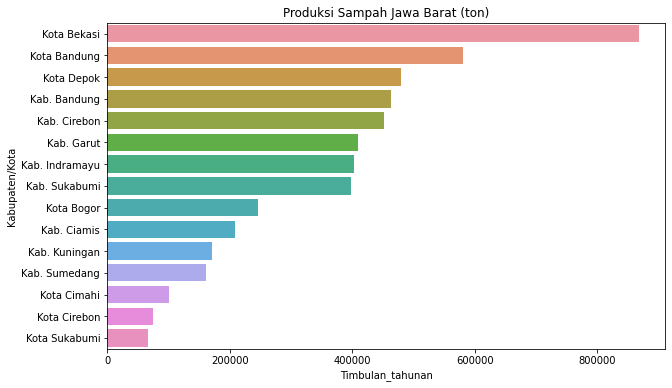

In [ ]:
# bar plot untuk melihat kota mana yang menjadi penyumbang timbulan sampah terbesar
plt.figure(figsize=(10,6))
plt.title('Produksi Sampah Jawa Barat (ton)')
sns.barplot(y=urut['Kabupaten/Kota'], x=urut['Timbulan_tahunan'])
plt.ylabel('Kabupaten/Kota')

In [ ]:
# konstribusi 3 kota
terbanyak = timbulan.loc[timbulan.Kab_Kota.isin(['Kota Bekasi','Kota Bandung','Kota Depok'])]
konstribusi=terbanyak.Timbulan_tahunan.sum()
konstribusi/m*100

37.96177081490526

In [ ]:
# ambil dataset komposisi jenis sampah dari google drive
jenis = pd.read_csv('/content/gdrive/MyDrive/jenis2021.csv')
jenis20 = pd.read_csv('/content/gdrive/MyDrive/jenis2020.csv')

In [ ]:
komposisi = jenis.loc[:,~jenis.columns.isin(['Kabupaten/Kota','total(ton)'])]
komposisi20 = jenis20.loc[:,~jenis20.columns.isin(['Kabupaten/Kota','total(ton)'])]
jml = komposisi.sum()
jml20 = komposisi20.sum()

In [ ]:
p = pd.DataFrame({'Jenis':jml.index,'2021':jml})
p20 = pd.DataFrame({'Jenis':jml20.index,'2020':jml20})
gab = pd.merge(p20,p,on='Jenis')
gab

,Jenis,2020,2021
0,Sisa Makanan (ton),974657.232939,2.003174e+06
1,Kayu-Ranting (ton),175995.449182,2.390938e+05
2,Kertas-Karton (ton),256824.779629,4.224587e+05
3,Plastik(ton),372837.735320,7.940360e+05
4,Logam(ton),44968.650534,5.214094e+04
5,Kain(ton),39266.431270,1.377898e+05
6,Karet- Kulit (ton),11380.241040,3.145697e+04
7,Kaca(ton),64195.439716,8.797358e+04
8,Lainnya(ton),209745.105175,2.261665e+05


Text(0.5, 0, 'Tahun')

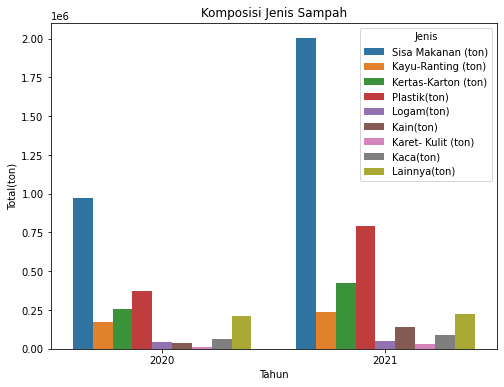

In [ ]:
# tambahan bar plot tahun 2020 sebagai perbandingan
f = gab.melt('Jenis',var_name='Tahun',value_name='Total')
plt.figure(figsize=(8,6))
plt.title('Komposisi Jenis Sampah')
sns.barplot(x=f['Tahun'],y=f['Total'],hue=f['Jenis'])
plt.ylabel('Total(ton)')
plt.xlabel('Tahun')

([<matplotlib.patches.Wedge at 0x7f95ba965eb0>,
 [Text(1.099987633348017, 0.0052159832657660875, 'Sisa Makanan (ton)'),
  Text(-0.21587913244438142, 1.0786084554531645, 'Kayu-Ranting (ton)'),
  Text(-0.7235523583916036, 0.8285360491046534, 'Kertas-Karton (ton)'),
  Text(-1.0940722029259573, -0.11404391603563463, 'Plastik(ton)'),
  Text(-0.7901619874544231, -0.765273829150113, 'Logam(ton)'),
  Text(-0.6674664979254894, -0.8743503154611902, 'Kain(ton)'),
  Text(-0.5455147842360946, -0.9552034443927887, 'Karet- Kulit (ton)'),
  Text(-0.45351503819552397, -1.002159722863832, 'Kaca(ton)'),
  Text(-0.1946426585135469, -1.0826422472297943, 'Lainnya(ton)')],
 [Text(0.5999932545534638, 0.002845081781326957, '50.2%'),
  Text(-0.11775225406057167, 0.5883318847926352, '6.0%'),
  Text(-0.39466492275905646, 0.4519287540570836, '10.6%'),
  Text(-0.5967666561414312, -0.06220577238307343, '19.9%'),
  Text(-0.43099744770241255, -0.4174220886273343, '1.3%'),
  Text(-0.36407263523208505, -0.47691835388792

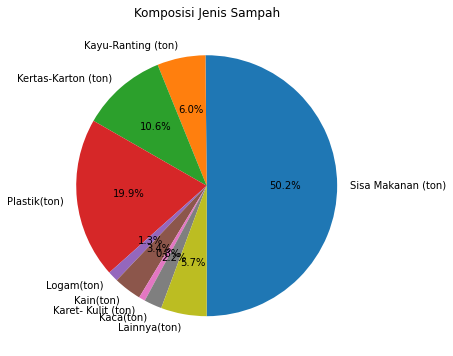

In [ ]:
# pie chart komposisi jenis sampah
plt.figure(figsize=(8,6))
plt.title('Komposisi Jenis Sampah')
plt.pie(gab['2021'],labels=gab['Jenis'],autopct='%1.1f%%',startangle=270)

In [ ]:
# melihat dataframe capaian yang telah didefinisikan
capaian

,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Tahunan (ton/tahun)(A),Pengurangan Sampah Tahunan (ton/tahun)(B),%Pengurangan Sampah(B/A),Penanganan Sampah Tahunan (ton/tahun)(C),%Penanganan Sampah(C/A),Sampah Terkelola Tahunan (ton/tahun)(B+C),%Sampah Terkelola(B+C)/A,Daur ulang Sampah Tahunan (ton/tahun)(D),Bahan baku Sampah Tahunan (ton/tahun)(E),Recycling Rate(D+E)/A,P1/P2
0,2021,Jawa Barat,Kab. Sukabumi,397915.70,73312.06,18.42,91980.00,23.12,165292.06,41.54,0.00,NaN,0.00,P 1
1,2021,Jawa Barat,Kab. Bandung,462939.17,171554.50,37.06,115496.95,24.95,287051.45,62.01,123053.94,5996.95,27.88,P 2
2,2021,Jawa Barat,Kab. Garut,408821.79,30488.00,7.46,80942.40,19.80,111430.40,27.26,29900.77,NaN,7.31,P 2
3,2021,Jawa Barat,Kab. Ciamis,208818.25,99406.62,47.60,58473.00,28.00,157879.62,75.61,92777.75,4416.50,46.54,P 2
4,2021,Jawa Barat,Kab. Kuningan,170482.16,38614.10,22.65,73000.00,42.82,111614.10,65.47,9857.79,NaN,5.78,P 1
5,2021,Jawa Barat,Kab. Cirebon,451549.60,8585.94,1.90,65700.00,14.55,74285.94,16.45,8569.45,NaN,1.90,P 2
6,2021,Jawa Barat,Kab. Sumedang,161462.89,6640.55,4.11,43135.70,26.72,49776.25,30.83,6640.55,NaN,4.11,P 2
7,2021,Jawa Barat,Kab. Indramayu,402455.25,48430.29,12.03,195083.61,48.47,243513.90,60.51,14571.24,49.14,3.63,P 2
8,2021,Jawa Barat,Kota Bogor,245922.33,49345.57,20.07,186844.17,75.98,236189.74,96.04,679.42,2884.17,1.45,P 2
9,2021,Jawa Barat,Kota Sukabumi,65795.65,15475.16,23.52,49221.92,74.81,64697.09,98.33,3273.21,1.64,4.98,P 2


In [ ]:
# khusus persentase penanganan
capaian = pd.read_excel('/content/drive/MyDrive/CAPAIAN.xlsx')
penanganan = capaian.iloc[:,[2,7]].sort_values('%Penanganan Sampah(C/A)',ascending=False)
penanganan

,Kabupaten/Kota,%Penanganan Sampah(C/A)
13,Kota Depok,80.72
10,Kota Bandung,80.63
14,Kota Cimahi,76.87
8,Kota Bogor,75.98
9,Kota Sukabumi,74.81
11,Kota Cirebon,71.77
12,Kota Bekasi,50.53
7,Kab. Indramayu,48.47
4,Kab. Kuningan,42.82
3,Kab. Ciamis,28.00


Text(0, 0.5, 'Kabupaten/Kota')

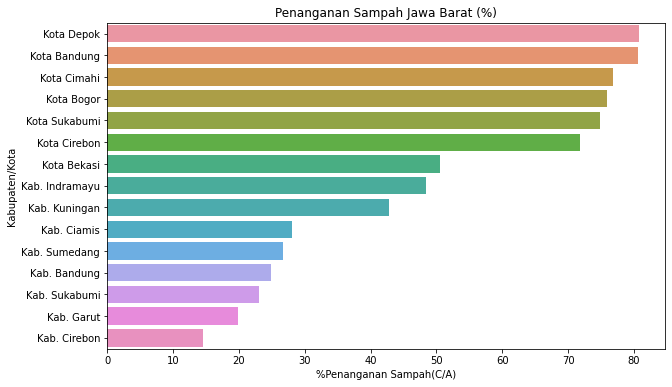

In [ ]:
# bar plot untuk melihat kota mana yang menangani sampah terbanyak
plt.figure(figsize=(10,6))
plt.title('Penanganan Sampah Jawa Barat (%)')
sns.barplot(y=penanganan['Kabupaten/Kota'], x=penanganan['%Penanganan Sampah(C/A)'])
plt.ylabel('Kabupaten/Kota')

In [ ]:
# definisikan dataframe total daur ulang
daur = capaian.iloc[:,[2,3,10,11]]
daur['daur'] = daur['Daur ulang Sampah Tahunan (ton/tahun)(D)'] + daur['Bahan baku Sampah Tahunan (ton/tahun)(E)']
total_daur = daur['daur'].sum()
total = daur['Timbulan Sampah Tahunan (ton/tahun)(A)'].sum()

<ipython-input-191-bc9c3fe2efdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daur['daur'] = daur['Daur ulang Sampah Tahunan (ton/tahun)(D)'] + daur['Bahan baku Sampah Tahunan (ton/tahun)(E)']


In [ ]:
total_daur

390319.93000000005

In [ ]:
# brp persen sampah yg didaur ulang?
total_daur/total*100

7.684580644993753

In [ ]:
rate = capaian.iloc[:,[2,7,12]]
rate

,Kabupaten/Kota,Recycling Rate(D+E)/A
0,Kab. Sukabumi,0.00
1,Kab. Bandung,27.88
2,Kab. Garut,7.31
3,Kab. Ciamis,46.54
4,Kab. Kuningan,5.78
5,Kab. Cirebon,1.90
6,Kab. Sumedang,4.11
7,Kab. Indramayu,3.63
8,Kota Bogor,1.45
9,Kota Sukabumi,4.98


In [ ]:
bekasi = capaian.iloc[12,[5,7,12]]
b = pd.DataFrame({'kelola':bekasi.index,'persentase':bekasi})
b

,kelola,persentase
%Pengurangan Sampah(B/A),%Pengurangan Sampah(B/A),0.43
%Penanganan Sampah(C/A),%Penanganan Sampah(C/A),50.53
Recycling Rate(D+E)/A,Recycling Rate(D+E)/A,0.03


In [ ]:
bekasi

%Pengurangan Sampah(B/A)     0.43
%Penanganan Sampah(C/A)     50.53
Recycling Rate(D+E)/A        0.03
Name: 12, dtype: object

In [ ]:
c=b.append({'kelola':'sisa','persentase':100 - bekasi.sum()},ignore_index=True)
c

,kelola,persentase
0,%Pengurangan Sampah(B/A),0.43
1,%Penanganan Sampah(C/A),50.53
2,Recycling Rate(D+E)/A,0.03
3,sisa,49.01


([<matplotlib.patches.Wedge at 0x7f95ba5a2220>,
 [Text(1.099899632577569, 0.014859281803931729, '%Pengurangan Sampah(B/A)'),
  Text(-0.04801963740328298, 1.0989513703634284, '%Penanganan Sampah(C/A)'),
  Text(-1.0979365471786942, -0.06734492088737719, 'Recycling Rate(D+E)/A'),
  Text(0.0342063160407067, -1.099468020427572, 'sisa')],
 [Text(0.5999452541332194, 0.008105062802144578, '0.4%'),
  Text(-0.026192529492699804, 0.5994280201982336, '50.5%'),
  Text(-0.5988744802792877, -0.03673359321129664, '0.0%'),
  Text(0.0186579905676582, -0.5997098293241301, '49.0%')])

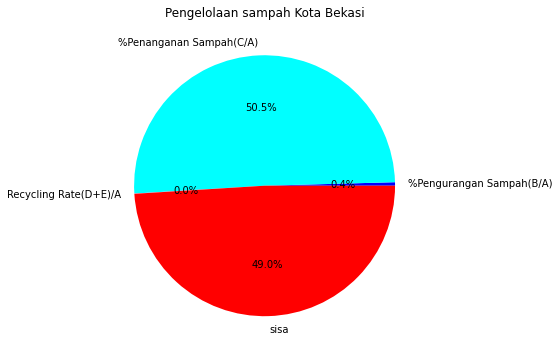

In [ ]:
# komposisi sampah yang terkelola di kota Bekasi
plt.figure(figsize=(8,6))
plt.title('Pengelolaan sampah Kota Bekasi')
plt.pie(c['persentase'],labels=c['kelola'],autopct='%1.1f%%',startangle=0,colors=('blue','cyan','violet','red'))